##### cc5219

In [1]:
from __future__ import print_function, division
import numpy as np
import pylab as pl
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv("https://data.cityofnewyork.us/resource/h9gi-nx95.csv")
data.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,10/21/2016,0:10,BRONX,10457.0,40.846827,-73.897043,"(40.8468268, -73.8970434)",EAST TREMONT AVENUE,BATHGATE AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3544214,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
1,10/21/2016,0:10,BRONX,10468.0,40.862818,-73.907781,"(40.8628183, -73.9077814)",NaN,NaN,150 WEST FORDHAM ROAD,...,Unspecified,NaN,NaN,NaN,3545048,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN
2,10/21/2016,0:10,BROOKLYN,11211.0,40.710957,-73.951117,"(40.7109568, -73.9511173)",BORINQUEN PLACE,union avenue,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,3544368,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
3,10/21/2016,0:10,BROOKLYN,11223.0,40.604741,-73.972270,"(40.6047408, -73.9722699)",NaN,NaN,1968 MC DONALD AVENUE,...,Unspecified,NaN,NaN,NaN,3545385,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
4,10/21/2016,0:10,MANHATTAN,10001.0,40.751142,-73.997914,"(40.7511421, -73.9979139)",NaN,NaN,356 9 AVENUE,...,Driver Inattention/Distraction,NaN,NaN,NaN,3545307,TAXI,NaN,NaN,NaN,NaN


In [3]:
data.columns

Index([u'DATE', u'TIME', u'BOROUGH', u'ZIP CODE', u'LATITUDE', u'LONGITUDE',
       u'LOCATION', u'ON STREET NAME', u'CROSS STREET NAME',
       u'OFF STREET NAME', u'NUMBER OF PERSONS INJURED',
       u'NUMBER OF PERSONS KILLED', u'NUMBER OF PEDESTRIANS INJURED',
       u'NUMBER OF PEDESTRIANS KILLED', u'NUMBER OF CYCLIST INJURED',
       u'NUMBER OF CYCLIST KILLED', u'NUMBER OF MOTORIST INJURED',
       u'NUMBER OF MOTORIST KILLED', u'CONTRIBUTING FACTOR VEHICLE 1',
       u'CONTRIBUTING FACTOR VEHICLE 2', u'CONTRIBUTING FACTOR VEHICLE 3',
       u'CONTRIBUTING FACTOR VEHICLE 4', u'CONTRIBUTING FACTOR VEHICLE 5',
       u'UNIQUE KEY', u'VEHICLE TYPE CODE 1', u'VEHICLE TYPE CODE 2',
       u'VEHICLE TYPE CODE 3', u'VEHICLE TYPE CODE 4', u'VEHICLE TYPE CODE 5'],
      dtype='object')

In [4]:
data2 = data[['BOROUGH','NUMBER OF PERSONS INJURED','NUMBER OF PEDESTRIANS INJURED','NUMBER OF MOTORIST INJURED']]
data2.sort(['BOROUGH'])

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,BOROUGH,NUMBER OF PERSONS INJURED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF MOTORIST INJURED
0,BRONX,0,0,0
635,BRONX,0,0,0
634,BRONX,0,0,0
633,BRONX,0,0,0
218,BRONX,1,0,1
422,BRONX,0,0,0
318,BRONX,0,0,0
317,BRONX,0,0,0
316,BRONX,0,0,0
114,BRONX,0,0,0


In [5]:
sumboro=data2.groupby(data2['BOROUGH']).sum()

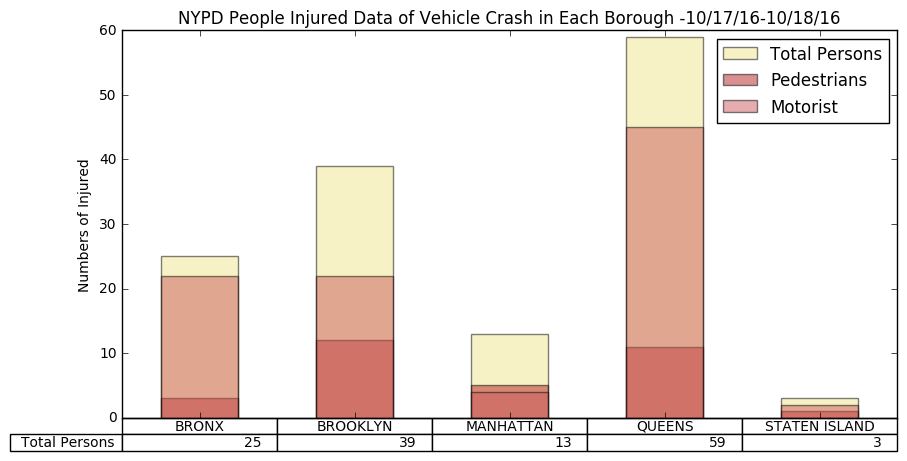

In [18]:
fig = pl.figure(figsize(10,5))
#sumboro1 = sumboro[['NUMBER OF PEDESTRIANS INJURED','NUMBER OF MOTORIST INJURED']]
ax = sumboro['NUMBER OF PERSONS INJURED'].plot(kind="bar",color='khaki', alpha=0.5,label='Total Persons',table = True)
ax = sumboro['NUMBER OF PEDESTRIANS INJURED'].plot(kind="bar",color='firebrick', alpha=0.5,label='Pedestrians')
ax = sumboro['NUMBER OF MOTORIST INJURED'].plot(kind="bar",color='IndianRed', alpha=0.5,label='Motorist'
                                                 )
#ax = sumboro.plot(kind = 'bar',table = True)
#ax = sumboro['NUMBER OF MOTORIST INJURED'].hist()
#sumboro1.plot(kind = 'bar', color='firebrick' ,stacked = True)
tmp = ax.xaxis.set_ticklabels(['         ', '', '          ', '', ''], fontsize=10)
ax.set_title('NYPD People Injured Data of Vehicle Crash in Each Borough -10/17/16-10/18/16')
ax.set_ylabel ("Numbers of Injured")
ax.set_xlabel (" ")
pl.legend()